# Práctica final. Aprendizaje automático aplicado

Adrián Garrudo Antona

# Ejercicio 1. Modelo predictivo consumo de automóviles

## 1.1 Librería

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
import datetime


## 1.2 Cargamos dataset

In [ ]:
auto = pd.read_csv('auto.csv', sep=";")
df = auto.copy()

## 1.3 Descripción básica de vareables

In [ ]:
print(df.head(10))

print(df.dtypes)

print (df.describe())

In [ ]:
corr     = df.corr()
print(corr)

Dentro del correlograma observamos relaciones intuitivas, como la relación positiva que existe entre variables como el númerico de cilindros y la potencia (horsepower), o la correlación que existe entre la variable aceleración y el consumo (mpg), a mayor aceleración mayor consumo de combustible tendrá el vehículo.

## 1.4 Transformación y selección de variables

Primero vamos a modificar la variable "model year" por "age", de esta manera la interpretación será más intuitiva. Por otro lado, diferenciamos el dataframe entre variable dependiente (y) y las independientes (x), 

In [ ]:
df['model_year'] = '19' + df['model_year'] .astype(str)
df['age'] = datetime.datetime .now() .year - pd.to_numeric(df['model_year'])
df.drop(['model_year'], axis =1, inplace = True)

y=df['mpg']
x=df[df.columns].drop(['mpg'], axis=1)
scaler=StandardScaler().fit(x)
scaler.transform(x)

Uno de los problemas más habituales en este tipo de estudios es la multicolinealidad, viendo la naturaleza de las variables ya podemos suponer que habrá alguna con alta multicolinealidad, basicamente significa que existe una dependencia lineal entre varaibles. Esto puede llevarnos a resultados erroneos, por ello utilizaremos el método VIF para estudiar esta relación entre variables.

In [ ]:
def calculateVIF(df):
    features = list(df.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_features = features[ite]
        x_features.remove(y_features)
        
        x = df[x_features]
        y = df[y_features]
        
        model.fit(df[x_features], df[y_features])
        
        result[y_features] = 1/(1 - model.score(df[x_features], df[y_features]))
    
    return result

print(calculateVIF(df))

La variable 'displacement' tiene una alta multicolinealidad, prescendiremos de ella en el modelo. Otra transformación que debemos hacer es la de transformar la variable origen, ya que es una variable categórica, debemos generar dummies para que el modelo no confunda la cardinalidad de la variable numérica. Finalmente eliminamos la variable origen ya que el modelo mejoraba al elimnarla, se explica con más detalle en el punto "1.6 Modelo Regresión Lineal"

In [ ]:
x = x.drop(['origin','displacement'],axis=1)

Normalizamos también las variables numéricas para que el modelo trabaje mejor, se ha comprobado sin normalizar estas variables y se pierden unas decimas del coeficiente de determinación 

In [ ]:
scaler=StandardScaler().fit(x)
scaler.transform(x)

In [ ]:
print(x.columns)

## 1. 6 Modelo Regresión Lineal

Vamos a realizar un modelo lineal, para ello primero tenemos que dividir el dataframe en entrenamiento (75% de los datos) y en test (25% restante de la información)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

Definimos el modelo y lo entrenamos

In [ ]:
model = LinearRegression(fit_intercept = True)
model.fit(x_train, y_train)

In [ ]:
print('R2 en entrenamiento es: ', model.score(x_train, y_train))
print('R2 en validación es: ', model.score(x_test, y_test))
print('Los coeficientes betas son: ', model.coef_)

Hemos probado el modelo con distintas modificaciones y configuraciones. Finalmente hemos elegido un modelo con constante (B0), variables normalizadas, sin variables displacement y origin. 
Nos hemos basado en el coeficiente de determinación (R2) y en el ajustado.
La mayor duda se ha generado al incorporar las dummies de la variable origen, en ese caso R2 pasaba a 0.81 y ajustado 0.75, son datos muy similares a los obtenidos pero hay mayor diferencia entre R2 y ajustado, se sobreentiende el pequeño sobreajuste al incorporar las dummies.

## 1.7 Predicciones

Para hacer el ejercicio algo mas interactivo hemos incluido un pequeño cuestionario para un futuro cliente, se realiza una simple predicción dependiendo de la respuesta del usuario

In [ ]:
print('Si quiere saber cuanto consume su coche complete el siguiente cuestionario')
cil = input(' ¿Cuántos cilindros tiene su coche? ')
hp = input(' ¿Cuántos caballos tiene su coche? ')
w = input(' ¿Y cuánto pesa? ')
ac = input(' ¿Qué aceleración tiene? ')
age = input(' ¿Y Cuántos años tiene? ')


predicciones = model.predict(x_train)
pred1 = model.predict([[cil,hp,w,ac,age,]])
print('Su coche consume', pred1, 'según nuestras predicciones')

# Ejercicio 2. Ejercicio Theano

## 2.1Librerías

In [1]:
import theano
import theano.tensor as T
import numpy as np
import math

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\adria\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 2.2 Conjunto de datos

Creamos un conjunto de datos con el código indicado

In [2]:
trX = np.linspace(-1, 1, 101)

trY = np.linspace(-1, 1, 101)

for i in range(len(trY)):
    trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033
    
n_iter = 15

print(trY)

[ 0.11614246  0.09432416  0.12403307  0.04933715  0.06297934  0.04235506
  0.06924157  0.03058467  0.06759213  0.12774363  0.11519872  0.08448727
  0.03307696  0.07974373  0.00196161  0.08359925  0.06401579  0.08237518
  0.09063124  0.07875552  0.11148505  0.05320802  0.05740104 -0.00298386
  0.09537854  0.07299553  0.0065827   0.10528661  0.00778927  0.0059318
  0.04111538  0.04568605  0.05669045  0.04208161  0.05603392  0.0300178
  0.03706761 -0.00395608  0.04491763  0.03042381  0.02828964  0.02987538
  0.03814717  0.01480848  0.03592566  0.03533859  0.02550149 -0.04506839
  0.04485691  0.00195141 -0.02539134  0.03524268  0.07602058  0.05608183
  0.04371402  0.05478763  0.14682458  0.15414502  0.14660686  0.10392268
  0.21633092  0.18837727  0.21350174  0.17431284  0.24556828  0.24102341
  0.2848591   0.30169565  0.30177453  0.21185685  0.31092155  0.38826758
  0.37065708  0.39147838  0.3593932   0.37578674  0.47660078  0.45163243
  0.38821931  0.39839944  0.43641386  0.51181732  0.5

## 2.3 Variables simbólicas

In [3]:
X = T.scalar()
Y = T.scalar()

## 2.4 Definimos el modelo

In [4]:
def model(X, w, c):
    
    return T.log(1 + w * abs(X) ) + c * X


## 2.5 Creamos variables compartidas y definimos las funcion de coste

In [5]:
w = theano.shared(np.asarray(1., dtype = theano.config.floatX))
c = theano.shared(np.asarray(1., dtype = theano.config.floatX))
y = model(X,w,c)

In [6]:
cost       = T.mean(T.sqr (y - Y))
gradient_w = T.grad(cost = cost, wrt = w)
gradient_c = T.grad(cost = cost, wrt = c)
updates    = [[w, w - gradient_w * 0.01], [c, c - gradient_c * 0.01]]


## 2.6 Entrenamos el modelo y obtenemos los parametros w_0, W_1 y el coste

In [10]:
train = theano.function(inputs = [X, Y], outputs = cost, updates = updates)

for i in range(n_iter):
    
    for x, y in zip(trX, trY):
        
        cost_i = train(x, y)
        
    print('\nEn el paso', i, 'el valor de W_0 es: ', w.get_value(), 
          'y el valor de W_1 es:', c.get_value(), 'cuyo coste es:', cost_i)


En el paso 0 el valor de W_0 es:  0.5140364702236366 y el valor de W_1 es: 0.3405615305799685 cuyo coste es: 5.769227755656424e-07

En el paso 1 el valor de W_0 es:  0.5140364562522252 y el valor de W_1 es: 0.3405615320921175 cuyo coste es: 5.76910708079527e-07

En el paso 2 el valor de W_0 es:  0.514036446541748 y el valor de W_1 es: 0.34056153314309934 cuyo coste es: 5.769023209533034e-07

En el paso 3 el valor de W_0 es:  0.5140364397927255 y el valor de W_1 es: 0.34056153387355864 cuyo coste es: 5.76896491729736e-07

En el paso 4 el valor de W_0 es:  0.5140364351019874 y el valor de W_1 es: 0.34056153438124576 cuyo coste es: 5.768924402917171e-07

En el paso 5 el valor de W_0 es:  0.5140364318418079 y el valor de W_1 es: 0.34056153473410117 cuyo coste es: 5.768896244504759e-07

En el paso 6 el valor de W_0 es:  0.5140364295759027 y el valor de W_1 es: 0.34056153497934455 cuyo coste es: 5.76887667375385e-07

En el paso 7 el valor de W_0 es:  0.5140364280010412 y el valor de W_1 es:

# Ejercicio 3. Segmentación de crímenes con K-means

## 3.1 Librerías

In [1]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

## 3.2 Creamos el dataframe con los datos de los distintos crímenes

In [2]:
crime = pd.read_csv('crime_data.csv', sep=";")
df = crime.copy()

## 3.3 Observación de datos, descriptivo y valores nulos

In [3]:
print(df.head(10))
print(df.dtypes)
print(df.describe())
print(df.isnull().sum())

         State  Murder  Assault  UrbanPop  Rape
0      Alabama    13.2    236.0      58.0  21.2
1       Alaska    10.0    263.0      48.0  44.5
2      Arizona     8.1    294.0      80.0  31.0
3     Arkansas     8.8    190.0      50.0  19.5
4   California     9.0    276.0      91.0  40.6
5     Colorado     7.9    204.0      78.0  38.7
6  Connecticut     3.3    110.0      77.0  11.1
7     Delaware     5.9    238.0      72.0  15.8
8      Florida    15.4    335.0      80.0  31.9
9      Georgia    17.4    211.0      60.0  25.8
State        object
Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    1

Como se puede observar el dataframe consta de 5 variables, la primera hace referencia al estado, es la única varaible string, el resto indican los 3 tipos de crímenes: asalto, asesinato y violación, representa el número de crimenes de cada tipo por cada 100.000 habitantes, son variables float. No encontramos valores nulos.  

## 3.4 Separamos la variable state del dataframe 

In [15]:
state = df['State']
df = df.drop(['State'], axis=1)

KeyError: 'State'

## 3.5 Obtención de número de clusters objetivo. 

Entrenamos el algoritmo KMeans para obtener el número óptimo de clústeres que mejor divide nuestro conjunto de datos

In [29]:
k_max = 7
k = [] 
for i in range(1, max_k):
    objetivo = KMeans(n_clusters = i, init = 'k-means++')
    objetivo.fit(df)
    k.append(objetivo.inertia_)

C:\Users\adria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


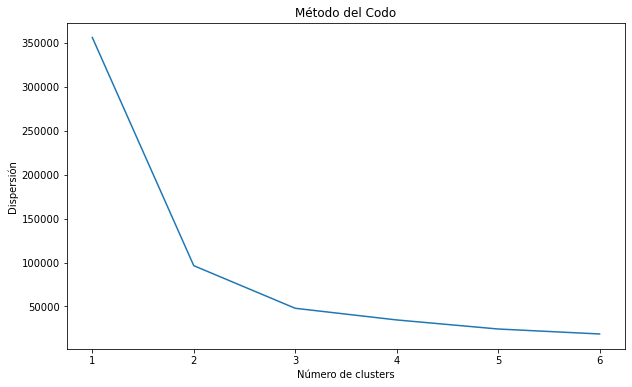

In [30]:
plt.figure(figsize=[10,6])
plt.plot(range(1, k_max), k)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Dispersión')
plt.show()

Observando la gráfica concluimos que el número de clusters óptimos es 3, la gráfica va descendiendo según aumenta el número de clústeres, a partir del tercero la dispersión se suaviza, por tanto, ese es el número óptimo.

## 3.6 Resultado de la predicción

Ejecutamos el algoritmo con el dataframe aportado de los estados, configuramos el random_state para que los resultados sean reproducibles y mostramos por pantalla los resultados

In [31]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 12)
y_kmeans = kmeans.fit_predict(df)

In [32]:
for j in range(max(y_kmeans)+1):
    print ("Cluster", j)
    print (crime["State"][y_kmeans ==j])

Cluster 0
3          Arkansas
5          Colorado
9           Georgia
20    Massachusetts
24         Missouri
29       New Jersey
35         Oklahoma
36           Oregon
38     Rhode Island
41        Tennessee
42            Texas
45         Virginia
46       Washington
49          Wyoming
Name: State, dtype: object
Cluster 1
6       Connecticut
10           Hawaii
11            Idaho
13          Indiana
14             Iowa
15           Kansas
16         Kentucky
18            Maine
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
34             Ohio
37     Pennsylvania
40     South Dakota
43             Utah
44          Vermont
47    West Virginia
48        Wisconsin
Name: State, dtype: object
Cluster 2
0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27   